In [3]:
import pandas as pd
from langdetect import detect
from mtranslate import translate
from requests.exceptions import ReadTimeout, RequestException
from IP2Location import IP2Location

data_frame = pd.read_csv("E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\cyber_attacks/cyber.csv", delimiter=',')

IDS
IDS (Intrusion Detection System) o sistema de detección de intrusiones: es una aplicación usada para detectar accesos no autorizados a un ordenador o a una red, es decir, son sistemas que monitorizan el tráfico entrante y lo cotejan con una base de datos actualizada de firmas de ataque conocidas. Ante cualquier actividad sospechosa, emiten una alerta a los administradores del sistema quienes han de tomar las medidas oportunas. Estos accesos pueden ser ataques esporádicos realizados por usuarios malintencionados o repetidos cada cierto tiempo, lanzados con herramientas automáticas. Estos sistemas sólo detectan los accesos sospechosos emitiendo alertas anticipatorias de posibles intrusiones, pero no tratan de mitigar la intrusión. Su actuación es reactiva.

IPS
IPS (Intrusion Prevention System) o sistema de prevención de intrusiones: es un software que se utiliza para proteger a los sistemas de ataques e intrusiones. Su actuación es preventiva. Estos sistemas llevan a cabo un análisis en tiempo real de las conexiones y los protocolos para determinar si se está produciendo o se va a producir un incidente, identificando ataques según patrones, anomalías o comportamientos sospechosos y permitiendo el control de acceso a la red, implementando políticas que se basan en el contenido del tráfico monitorizado, es decir, el IPS además de lanzar alarmas, puede descartar paquetes y desconectar conexiones.

Muchos proveedores ofrecen productos mixtos, llamándolos IPS/IDS, integrándose frecuentemente con cortafuegos y UTM (en inglés Unified Threat Management o Gestión Unificada de Amenazas) que controlan el acceso en función de reglas sobre protocolos y sobre el destino u origen del tráfico.

SIEM
SIEM (Security Information and Event Management) o sistema de gestión de eventos e información de seguridad: es una solución híbrida centralizada que engloba la gestión de información de seguridad (Security Information Management) y la gestión de eventos (Security Event Manager). La tecnología SIEM proporciona un análisis en tiempo real de las alertas de seguridad generadas por los distintos dispositivos hardware y software de la red. Recoge los registros de actividad (logs) de los distintos sistemas, los relaciona y detecta eventos de seguridad, es decir, actividades sospechosas o inesperadas que pueden suponer el inicio de un incidente, descartando los resultados anómalos, también conocidos como falsos positivos y generando respuestas acordes en base a los informes y evaluaciones que registra, es decir, es una herramienta en la que se centraliza la información y se integra con otras herramientas de detección de amenazas.

In [4]:
df = data_frame
df.sample()

Timestamp Source IP Address Destination IP Address  \
26334  2020-08-22 12:42:28     207.122.2.112           202.0.69.135   

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
26334        64173             59035      UDP            883        Data   

      Traffic Type                                       Payload Data  ...  \
26334          DNS  Recusandae similique accusamus sed. Dolorum pr...  ...   

      Action Taken  Severity Level User Information  \
26334      Ignored            High    Amira Goswami   

                                      Device Information Network Segment  \
26334  Mozilla/5.0 (iPod; U; CPU iPhone OS 3_2 like M...       Segment A   

           Geo-location Data Proxy Information Firewall Logs IDS/IPS Alerts  \
26334  Madhyamgram, Nagaland    204.131.250.65      Log Data     Alert Data   

      Log Source  
26334     Server  

[1 rows x 25 columns]

CREAMOS UN DICCIOMARIO CON LAS COLUMNAS ORIGINAL Y CON SU TRADUCCION


In [5]:
# Crear un DataFrame con columnas en español

df_esp = pd.DataFrame(df)
# Crear un diccionario con los nuevos nombres de las columnas
dict_esp = {
    "Timestamp": "Fecha_hora",
    "Source IP Address":"IP origen",
    "Destination IP Address":"IP destino",
    "Source Port":"Puerto_origen",
    "Destination Port":"Puerto_destino",
    "Protocol":"Protocolo",
    "Packet Length":"Longitud_paquete",
    "Packet Type": "Tipo_paquete",
    "Traffic Type":"Tipo_tráfico",
    "Payload Data": "Datos_carga_util",
    "Malware Indicators": "Indicadores_malware",
    "Anomaly Scores": "Puntuaciones_anomalías",
    "Alerts/Warnings": "Alertas_advertencias",
    "Attack Type": "Tipo_ataque",
    "Attack Signature": "Firma_ataque",
    "Action Taken": "respuesta_tomada",
    "Severity Level": "Nivel_severidad",
    "User Information": "Informacion_usuario",
    "Device Information": "Informacion_dispositivo",
    "Network Segment": "Segmento_red",
    "Geo-location Data": "Datos_geolocalización",
    "Proxy Information": "Informacion_proxy",
    "Firewall Logs": "Registros_cortafuegos",
    "IDS/IPS Alerts": "Alertas IDS(sist_detec_intrusos/IPS(sist_preve_intrusos)",
    "Log Source":"Fuente_registro"
    }




TRADUZCO COLUMNAS Y CONTENIDO DE PAY_LOAD A ESPAÑOL

In [15]:


# Crear un DataFrame de ejemplo
df_esp = pd.DataFrame(df)
# Crear un diccionario con los nuevos nombres de las columnas
dict_esp = {
    "Timestamp": "Fecha_hora",
    "Source IP Address":"IP origen",
    "Destination IP Address":"IP destino",
    "Source Port":"Puerto_origen",
    "Destination Port":"Puerto_destino",
    "Protocol":"Protocolo",
    "Packet Length":"Longitud_paquete",
    "Packet Type": "Tipo_paquete",
    "Traffic Type":"Tipo_tráfico",
    "Payload Data": "Datos_carga_util",
    "Malware Indicators": "Indicadores_malware",
    "Anomaly Scores": "Puntuaciones_anomalías",
    "Alerts/Warnings": "Alertas_advertencias",
    "Attack Type": "Tipo_ataque",
    "Attack Signature": "Firma_ataque",
    "Action Taken": "respuesta_tomada",
    "Severity Level": "Nivel_severidad",
    "User Information": "Informacion_usuario",
    "Device Information": "Informacion_dispositivo",
    "Network Segment": "Segmento_red",
    "Geo-location Data": "Datos_geolocalización",
    "Proxy Information": "Informacion_proxy",
    "Firewall Logs": "Registros_cortafuegos",
    "IDS/IPS Alerts": "Alertas IDS(sist_detec_intrusos/IPS(sist_preve_intrusos)",
    "Log Source":"Fuente_registro"
    }
# Aplicar el cambio de nombres usando el método rename
df.rename(columns=dict_esp, inplace=True)


def traducir_columna(df, columna, idioma_destino):
    # Definir la función para traducir si es necesario
    def traducir(texto):
        try:
            # Convertir el texto a cadena si no es de tipo str
            texto = str(texto)

            # Verificar si el texto contiene solo números
            if texto.isdigit():
                return texto  # No traducir números, devolver el texto original

            # Traducir solo si el idioma detectado no es el idioma de destino
            idioma_detectado = detect(texto)
            if idioma_detectado != idioma_destino:
                # Intentar la traducción y manejar el error específico
                try:
                    traduccion = translate(texto, idioma_destino)
                    if traduccion:
                        return traduccion
                    else:
                        print(f"La traducción para el texto '{texto}' es None.")
                        return texto
                except Exception as e:
                    print(f"Error durante la traducción: {e}. No se puede traducir el texto.")
                    return texto
            else:
                return texto

        except Exception as e:
            print(f"Error durante la traducción: {e}")
            return texto

    # Aplicar la función de traducción a la columna
    df[columna + '_traducido'] = df[columna].apply(traducir)
    return df

# Ejemplo de uso
df = df_esp
columna = "Payload Data"
idioma_destino = 'es'
df_traducido = traducir_columna(df, columna, idioma_destino)

# Muestra el DataFrame con la columna detectada y, si es necesario, traducida
print(df_traducido)


KeyboardInterrupt: 

In [6]:
df_traducido = pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\ciber_modificado.xlsx")

In [7]:
df_traducido

Fecha_hora    IP Origen    Destino IP  Puerto_origen  \
0     2023-05-30 06:33:58   1032161512     849164252          31225   
1     2020-08-26 07:08:30  78199217198   66191137154          17245   
2     2022-11-13 08:23:25    637921048    1982198217          16811   
3     2023-07-02 10:38:46   1634219610  101228192255          20018   
4     2023-07-16 13:11:07   7116618576  189243174238           6131   
...                   ...          ...           ...            ...   
39995 2023-05-26 14:08:42    263610926   12110075240          31005   
39996 2023-03-27 00:38:27    172116381   19610813478           2553   
39997 2022-03-31 01:45:49   1623521757      98107015          22505   
39998 2023-09-22 18:32:38  20872233205   17379112252          20013   
39999 2023-10-10 11:59:52   1410221108     109198457          50137   

       Puerto_destino Protocolo  Longitud_paquete Tipo_paquete  Tipo  \
0               17616      ICMP               503         Data  HTTP   
1               48166      ICMP              1174         Data  HTTP   
2               53600       UDP               306      Control  HTTP   
3               32534       UDP               385         Data  HTTP   
4               26646       TCP              1462         Data   DNS   
...               ...       ...               ...          ...   ...   
39995            6764       UDP              1428      Control  HTTP   
39996           28091       UDP              1184      Control  HTTP   
39997           25152       UDP              1043         Data   DNS   
39998            2703       UDP               483         Data   FTP   
39999           55575      ICMP              1175      Control  HTTP   

                                        Datos_carga_util  ...  \
0      El que nació del odio por el que se puso.La op...  ...   
1      Ábrelos a los modos de los deberes de la verda...  ...   
2      Llevar el sabio de la vida se suelta.Esto se s...  ...   
3      Todo el más bendecido explicó para explicar má...  ...   
4      No sé el dolor si esto es solo.Los placeres de...  ...   
...                                                  ...  ...   
39995  Quibusdam ullam consequatur consequuntur accus...  ...   
39996  Quaerat neque esse. Animi expedita natus commo...  ...   
39997  Enim at aspernatur illum. Saepe numquam eligen...  ...   
39998  Officiis dolorem sed harum provident earum dis...  ...   
39999  Eligendi omnis voluptate nihil voluptatibus do...  ...   

      respuesta_tomada  Nivel_severidad Informacion_usuario  \
0               Logged              Low       Reyansh Dugal   
1              Blocked              Low          Sumer Rana   
2              Ignored              Low        Himmat Karpe   
3              Blocked           Medium          Fateh Kibe   
4              Blocked              Low        Dhanush Chad   
...                ...              ...                 ...   
39995           Logged           Medium         Adira Madan   
39996           Logged             High           Rati Dara   
39997          Blocked              Low        Samiha Joshi   
39998          Ignored              Low       Rasha Chauhan   
39999           Logged           Medium         Zaina Kumar   

                                 Informacion_dispositivo Segmento_red  \
0      Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...    Segment A   
1      Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...    Segment B   
2      Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...    Segment C   
3      Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...    Segment B   
4      Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...    Segment C   
...                                                  ...          ...   
39995  Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...    Segment A   
39996  Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....    Segment C   
39997  Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...    Segment C   
39998  Mozilla/5.0 (X11; Linu

In [12]:
df_traducido["Datos_geolocalización"]


0                   Jamshedpur, Sikkim
1                   Bilaspur, Nagaland
2                    Bokaro, Rajasthan
3                   Jaunpur, Rajasthan
4                   Anantapur, Tripura
                     ...              
39995                  Nashik, Manipur
39996                Vadodara, Mizoram
39997    Mahbubnagar, Himachal Pradesh
39998      Rourkela, Arunachal Pradesh
39999         Pudukkottai, West Bengal
Name: Datos_geolocalización, Length: 40000, dtype: object

In [7]:
df_traducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   Fecha_hora                                                 40000 non-null  datetime64[ns]
 1   IP Origen                                                  40000 non-null  int64         
 2   Destino IP                                                 40000 non-null  int64         
 3   Puerto_origen                                              40000 non-null  int64         
 4   Puerto_destino                                             40000 non-null  int64         
 5   Protocolo                                                  40000 non-null  object        
 6   Longitud_paquete                                           40000 non-null  int64         
 7   Tipo_paquete                   

In [8]:
df_traducido.value_counts(normalize=True)

Fecha_hora           IP Origen     Destino IP    Puerto_origen  Puerto_destino  Protocolo  Longitud_paquete  Tipo_paquete  Tipo  Datos_carga_util                                                                                                                                                                                                                 Indicadores_malware  Puntuaciones_anomalías  Alertas_advertencias  Tipo_ataque  Firma_ataque     respuesta_tomada  Nivel_severidad  Informacion_usuario  Informacion_dispositivo                                                                                                          Segmento_red  Datos_geolocalización      Información_proxy  Registros_cortafuegos  Alertas IDS (SisterC_intrusos/IPS (Sister_Preve_intrusos)  Fuente_registro
2020-01-01 00:43:27  1596340232    843586112     30053          56285           UDP        1428              Data          DNS   Autem officiis officia sapiente adipisci. Corporis qui quasi debitis tempora 

array([[<Axes: title={'center': 'Fecha_hora'}>,
        <Axes: title={'center': 'IP Origen'}>,
        <Axes: title={'center': 'Destino IP'}>],
       [<Axes: title={'center': 'Puerto_origen'}>,
        <Axes: title={'center': 'Puerto_destino'}>,
        <Axes: title={'center': 'Longitud_paquete'}>],
       [<Axes: title={'center': 'Puntuaciones_anomalías'}>,
        <Axes: title={'center': 'Información_proxy'}>, <Axes: >]],
      dtype=object)

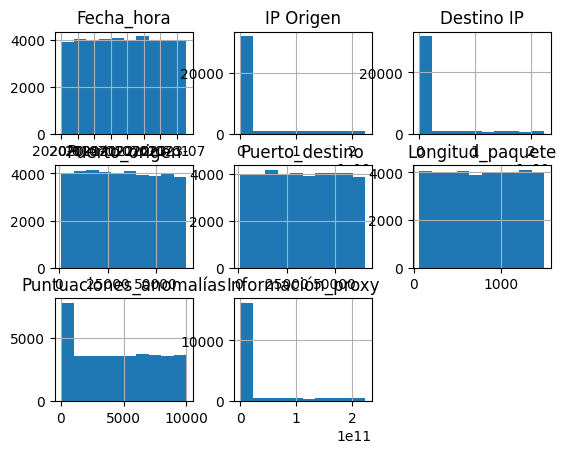

In [24]:
df_traducido.hist()

In [9]:
df_traducido.describe()

Fecha_hora     IP Origen    Destino IP  \
count                          40000  4.000000e+04  4.000000e+04   
mean   2021-11-22 06:17:52.200800256  3.031392e+10  3.055188e+10   
min              2020-01-01 00:43:27  2.151700e+04  2.208900e+04   
25%       2020-12-12 19:56:28.500000  1.001700e+09  1.028973e+09   
50%              2021-11-21 18:12:51  6.466671e+09  6.729165e+09   
75%       2022-10-30 08:48:10.500000  1.996264e+10  2.011926e+10   
max              2023-10-11 19:34:23  2.232533e+11  2.232552e+11   
std                              NaN  5.466664e+10  5.473096e+10   

       Puerto_origen  Puerto_destino  Longitud_paquete  \
count   40000.000000    40000.000000      40000.000000   
mean    32970.356450    33150.868650        781.452725   
min      1027.000000     1024.000000         64.000000   
25%     16850.750000    17094.750000        420.000000   
50%     32856.000000    33004.500000        782.000000   
75%     48928.250000    49287.000000       1143.000000   
max     65530.000000    65535.000000       1500.000000   
std     18560.425604    18574.668842        416.044192   

       Puntuaciones_anomalías  Información_proxy  
count            40000.000000       2.014900e+04  
mean              4547.413075       2.966701e+10  
min                  0.000000       5.241200e+04  
25%               1643.000000       1.031551e+09  
50%               4455.000000       6.319394e+09  
75%               7224.000000       1.982464e+10  
max               9999.000000       2.232532e+11  
std               3057.496197       5.378014e+10

8723


In [10]:

#ydataprofilig
df_y= df_traducido.copy()

In [11]:
from ydata_profiling import ProfileReport

In [12]:
ProfileReport(df_y) # un monton d ecampos en correlation nos da el valor de correlacion en referencia al coeficiente correlacional de pyrson  que esta etre -1 y 1( -0,7 valor alto negativo, 0,75 alta postiova, 0,018,
#, es uan correelacion muy pequeñña pq esta cerca del 0) # en colores mas intenso el color mas correlacion y menos color intesidad menor correlacion

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
# libreria D-Tale# ademas de ver los datos podemos editar los datos
import dtale


In [ ]:
dtale.show(df_y)

In [ ]:
#libreria SwwetViz
import sweetviz as sv



In [ ]:
# me hace el analisis
# el campo asssciantons, nos aporta graficos de correlaciones entre las variavles. los colores y la forma : un circulo ocuadrado si la variable es categorica o numerica. El tamañao de la figura la fuerza de la relacion
#el color al valor del coeficiente y la intesidad si azul es positivo y rojo es negativo

In [ ]:
report = sv.analyze(df_y)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


In [ ]:
report.show_html("informe_ciber_sweetviz.html")

Report informe_ciber_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#libreria missingno; nos proporciona una serie de visulaciones sobre la presencia y distribucion de datos falatntes o missing, es  especificca para valors faltantes.
import missingno as msno


<Axes: >

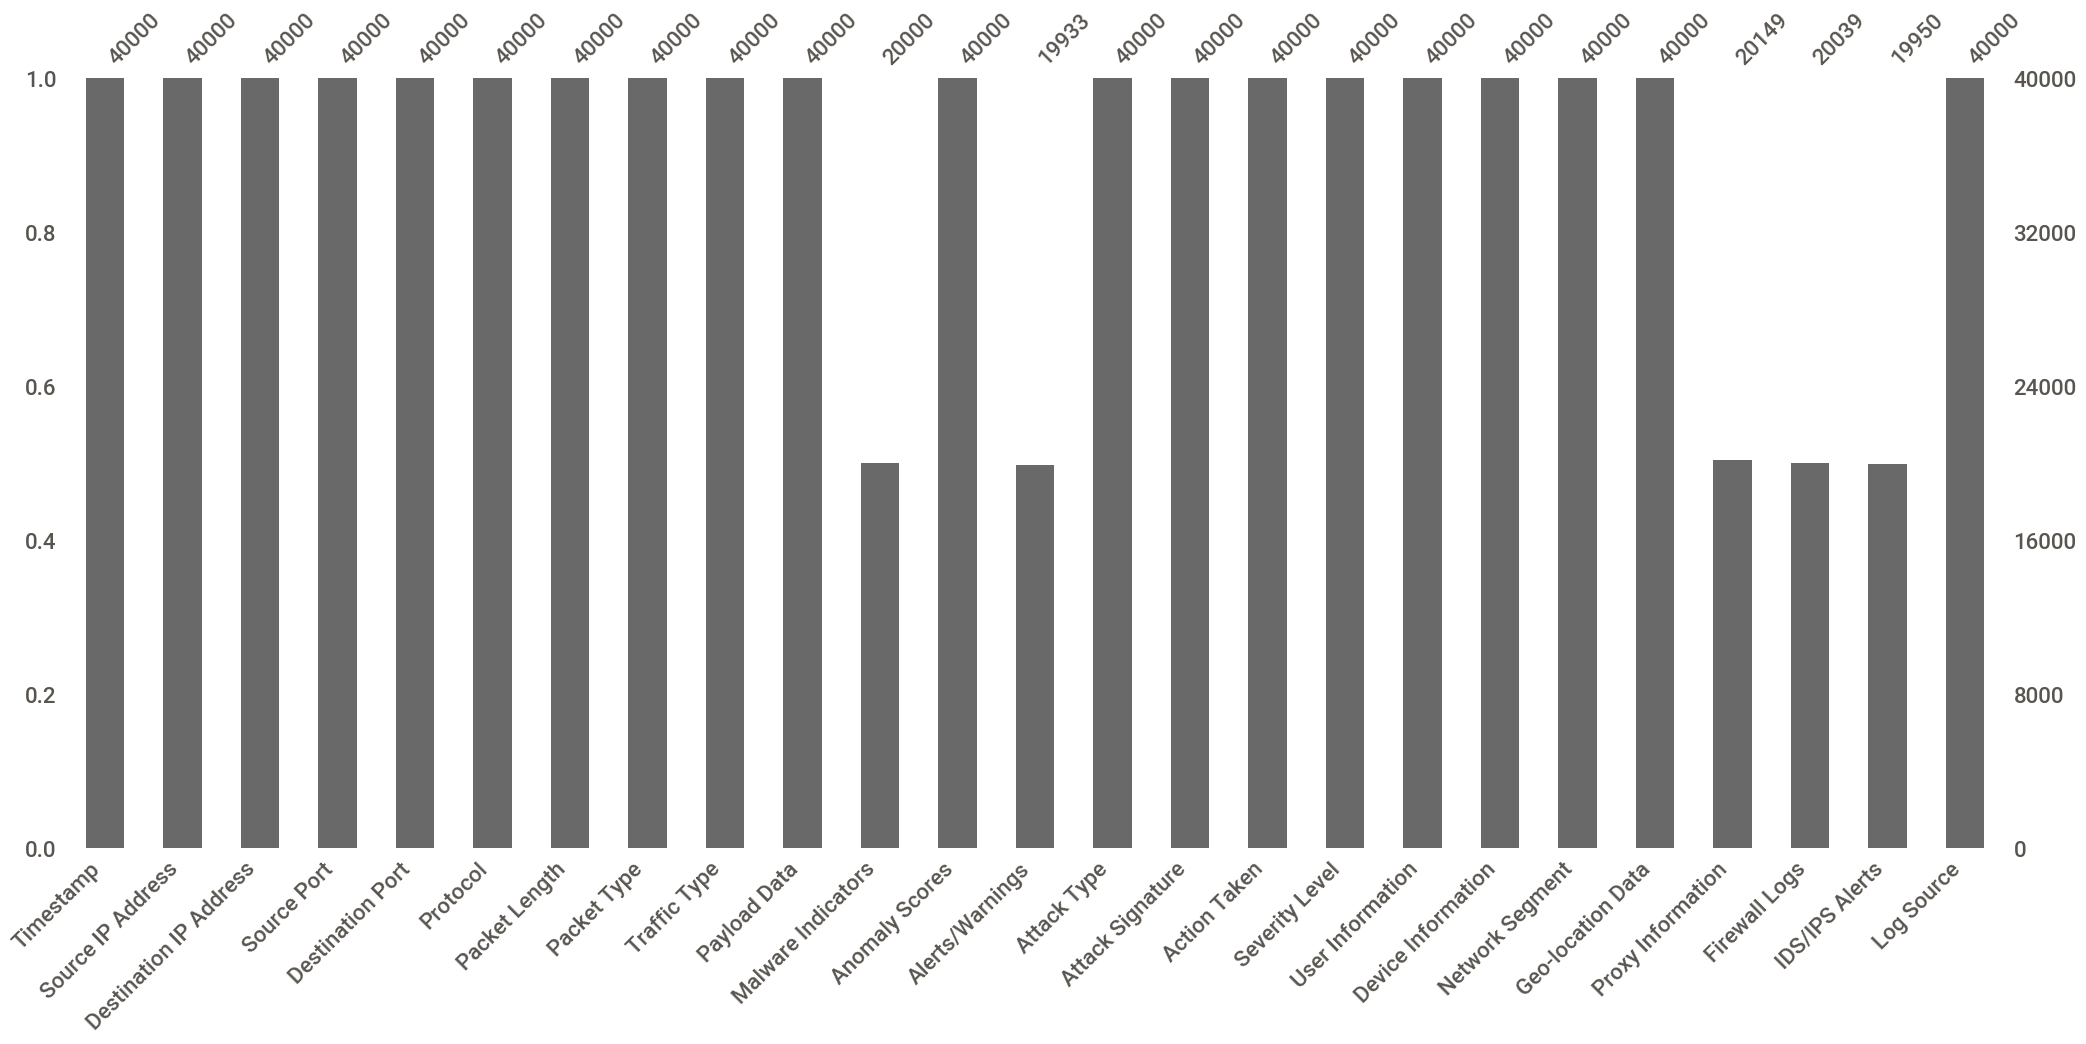

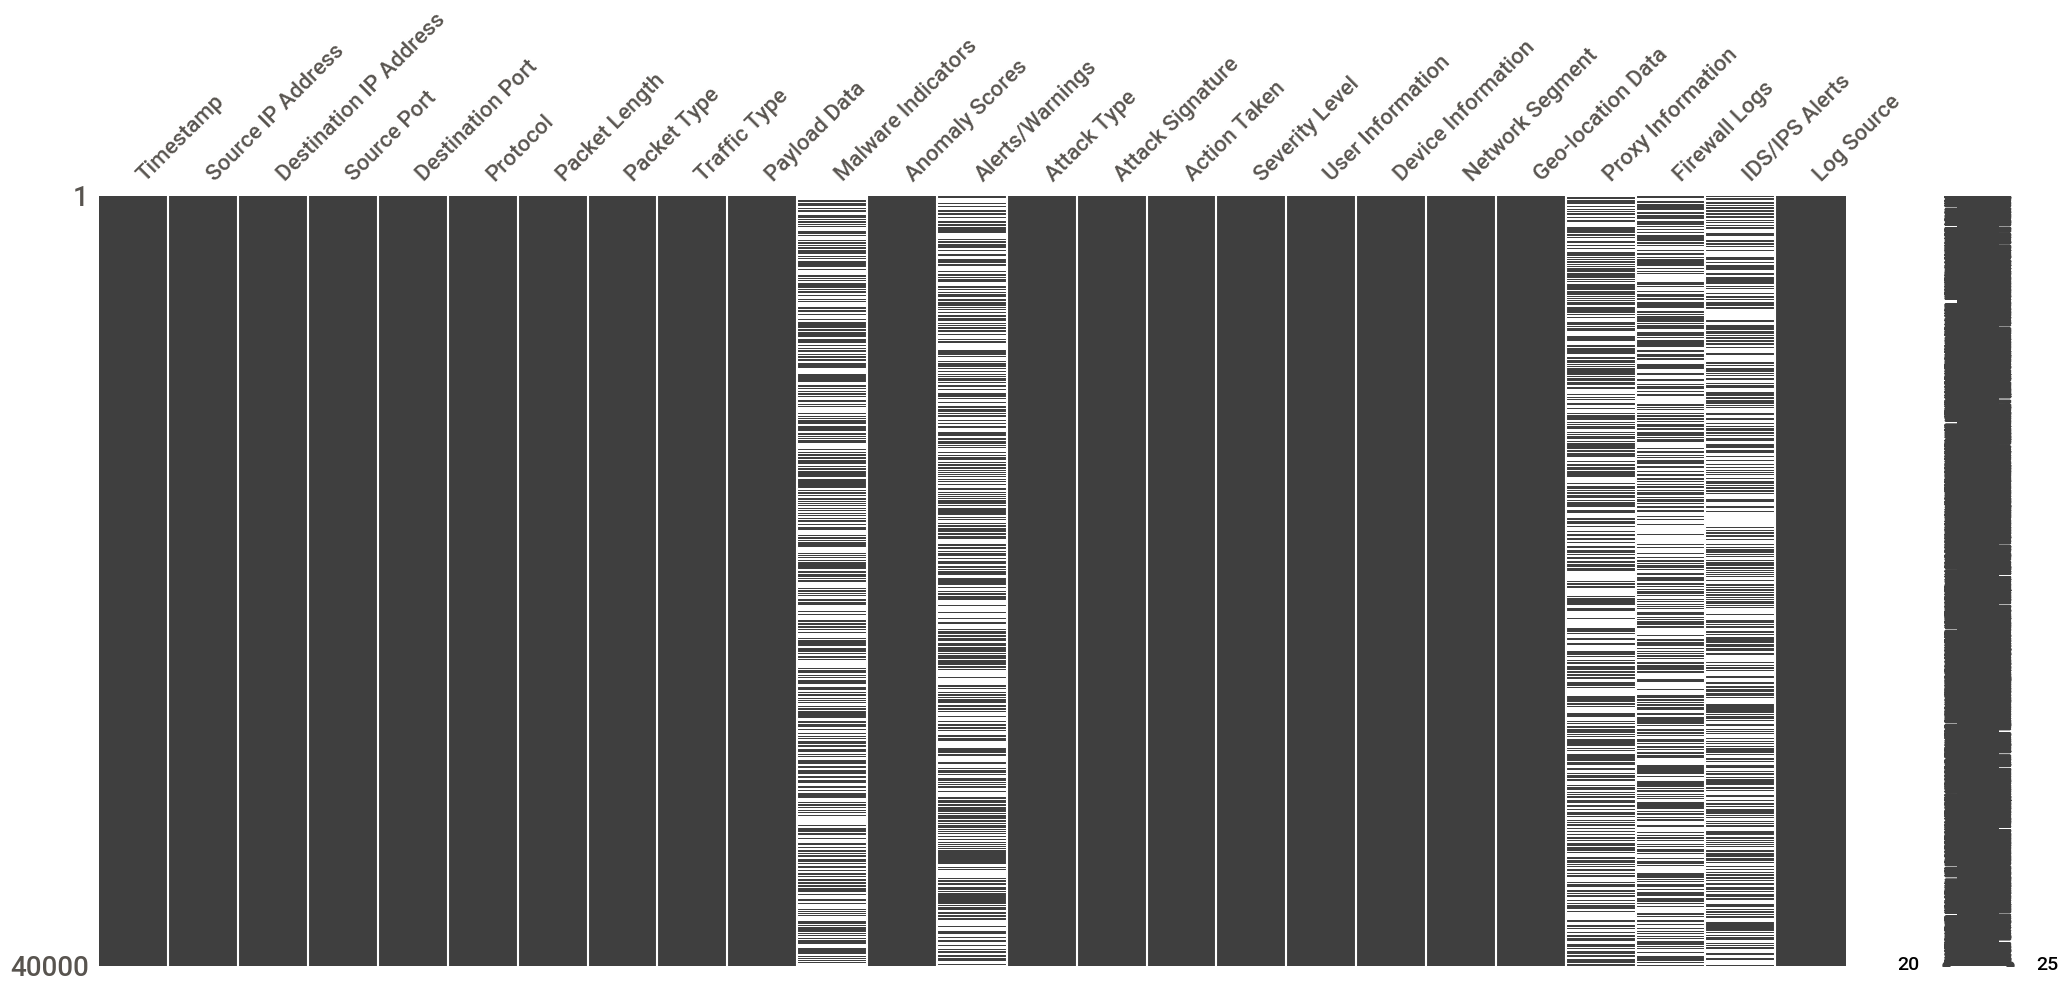

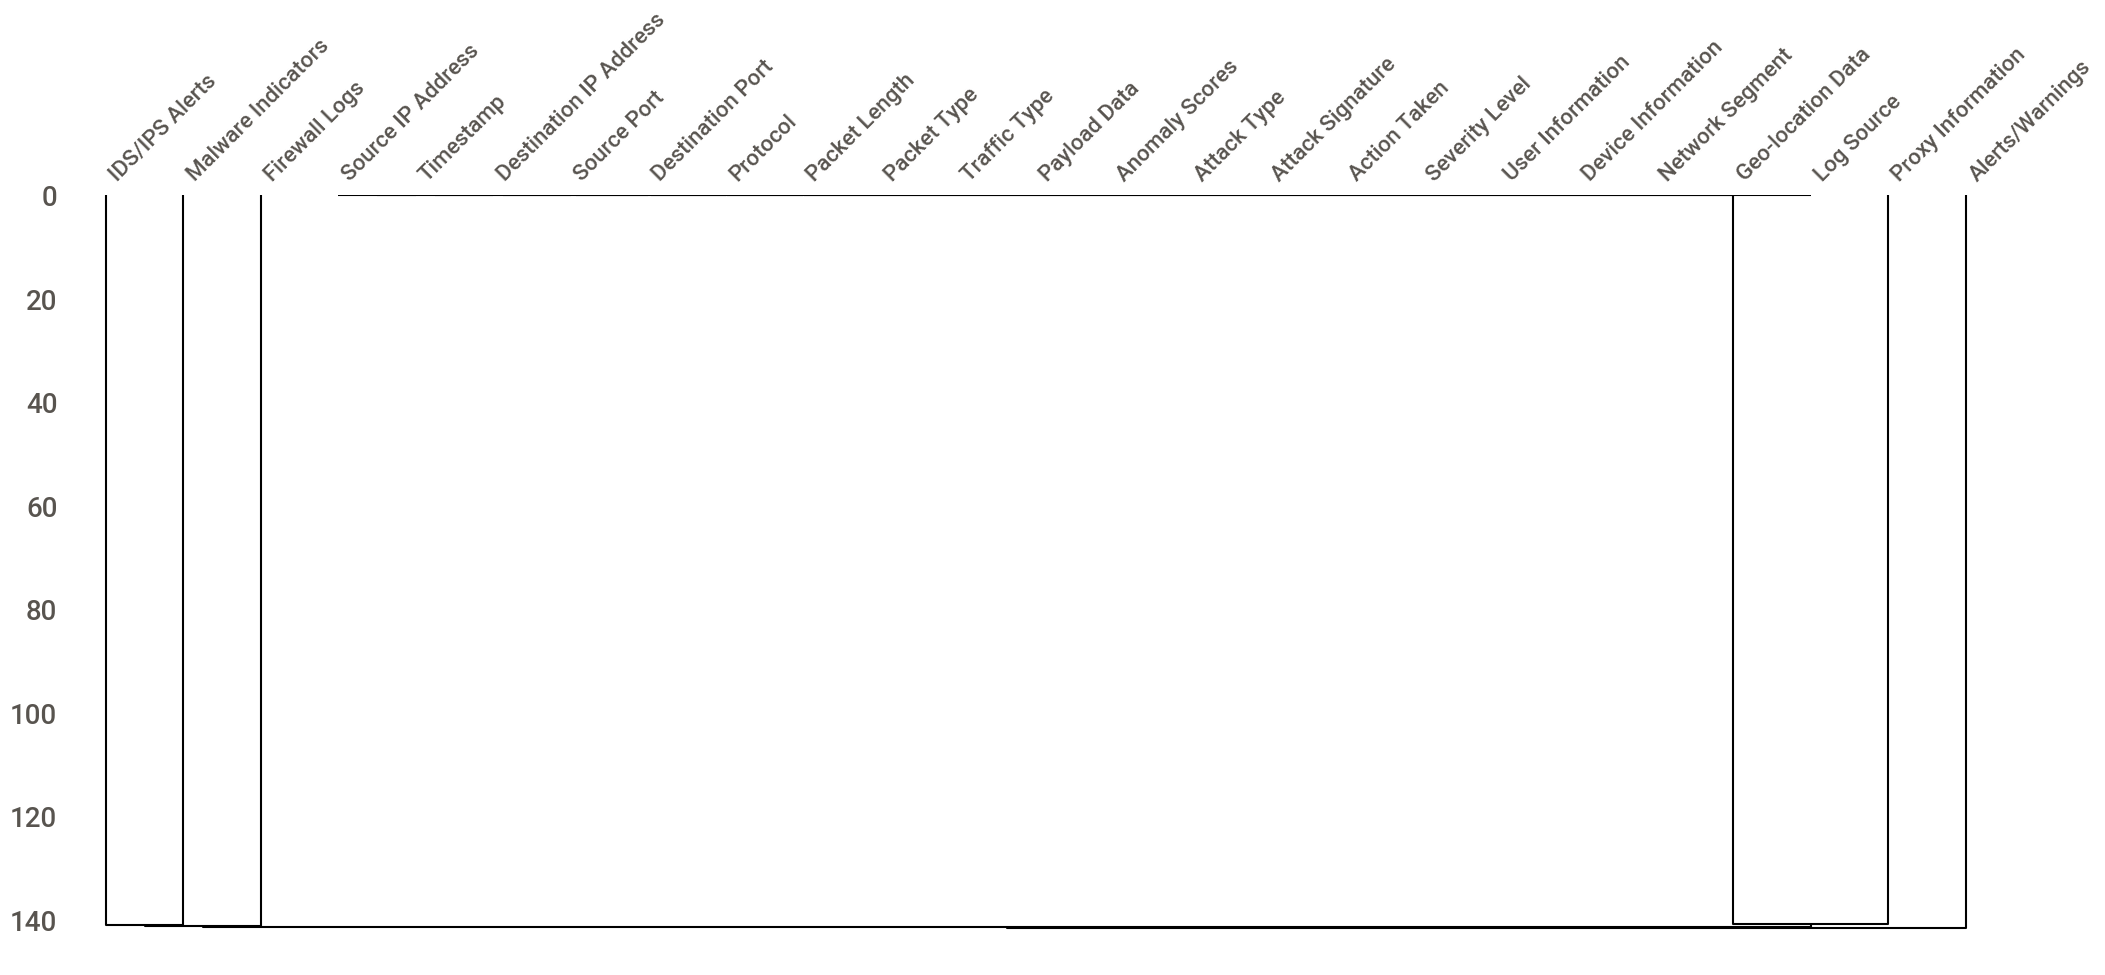

In [ ]:
msno.bar(df_y)# si tiene valores faltantes o no
msno.matrix(df_y)# nos dice donde se producen las NaN
msno.dendrogram(df_y)# o msno.heatmap(df) nos dice que tan correlacionados estan los valores faltantes



In [ ]:
# LIBRERIA SKETCH
# esta libreria es muy nueva de febredro de 20023, aprovecha la IA para hacer cosas con los dataset (df pandas) con un conjunto de preguntas en lenguiaje natural  de los que queremos obytener y me devuelve la respuesta
# hasta si le pedimos el codigo para hacer algo nos lo apporta. O me le hago la pregunta y me da el resultado o le pido el codigo para hacer la pregunta y me lo devuelves


In [ ]:
import sketch

In [ ]:
# el metodo .ask; es para hacerle preguntas usando lenguaje natural ( NLP) en ingles

df_y.sketch.ask("What are the max values of each numerical column")

NameError: name 'df_y' is not defined

In [ ]:
# como mi dataframe tiene un mayor numero de columnas que las predetermiadas por sketch, vamos a aumnmetarle el nuemro de columnas:
import os

# Establece la variable de entorno SKETCH_MAX_COLUMNS a un valor mayor
os.environ["SKETCH_MAX_COLUMNS"] = "30"  # Puedes ajustar este valor según tus necesidades

In [ ]:
df_y.sketch.ask("What are the top 3 countries with the highest number of attacks, and the top 3 countries of origin for the attacks?")

In [ ]:
df_y.sketch.ask("What are the IPs that are most frequently repeated in the attacks and their origin?")

In [ ]:
df_y.sketch.ask("Geolocate the IPs from the attacks and provide me with a detailed report for each of the IPs.")

In [ ]:
df_y.sketch.ask(" which servic dp you prefer to use:  MaxMind or IP2Location ")

In [ ]:
df_y.sketch.ask( "which servic dp you prefer to use:  OpenStreetMap, GeoNames, and Nominatim ")

In [1]:
from IP2Location import IP2Location

df_y.sketch.ask("Geolocate the IPs from the attacks and provide me with a detailed report for each of the IPs. you can use IP2location")

NameError: name 'df_y' is not defined

In [30]:
df_data = pd.read_csv("E:\Cursos\BC_Data_Science\Repositorio\proyecto EDA\data_ip_pais.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Cursos\\BC_Data_Science\\Repositorio\\proyecto EDA\\data_ip_pais.csv'

In [ ]:
df_y.sketch.ask("Tell me interesting questions you could ask me about this dataframe with the data provided in all the columns."



df_esp. head(1)

)